In [124]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [11]:
%time
traindf = pd.DataFrame.from_csv("data/train-exp.csv")

CPU times: user 9 µs, sys: 13 µs, total: 22 µs
Wall time: 96.1 µs


In [104]:
artists = pd.DataFrame.from_csv("data/artists.csv")
artists = artists.name.to_dict()

In [17]:
train_music = traindf.drop(["Sex", "Age", "Country"], axis=1).T

In [18]:
train_music.head()

,eb1c57ddc9e0e2d005169d3a1a96e8dd95e3af03,44ce793a6cd9d20f13f4a576a818ef983314bb5d,da9cf3f557161d54b76f24db64be9cc76db008e3,8fa49ab25d425edcf05d44bfc1d5aea895287d81,b85fcaef67d2669cd99b334b5e8c8705263db2cf,feed7a0dc74c5251283a1505adf453a2061d08f7,cbb86d88a8d2d0bab8956807c6c45cd0c752324b,5641e1e6f04868a61dc29f7227e34f4640163e9b,9f748976d303db79f61bf570d9549d6335b11b0e,056d5d2467dc63c4520963323e2ebf9576b58229,...,3d9fae0367a5d4994f2b9d31d96902d1a90d0e6d,cbcbecfe2d0d46d21d282361b239574258abc7ce,daab3b4a4381ac2c9b981f76fc6c309239be2c56,414d15128d42548c31745a2f41d3748166402117,3412149d6b5eaca4e08717fbb482959367ef87a1,3974a7716e43d116c03f7316448b8755d82944dc,d99df38f758cbbead294f0ca244c5a376cfcd5e8,a92ed04e3f646b46fc5a635ab6bcb0df43f43f52,8f6147769500d54dd980e36a849c167e2d3d26db,2ddedd2909ab17418106abbdb77bf40a62794978
03098741-08b3-4dd7-b3f6-1b0bfa2c879c,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69c4cc43-8163-41c5-ac81-30946d27bb69,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7a2e6b55-f149-4e74-be6a-30a1b1a387bb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7002bf88-1269-4965-a772-4ba1e7a91eaa,0,0,0,0,0,0,0,0,0,0,...,0,52,0,0,0,0,0,0,0,0
dbf7c761-e332-467b-b4d9-aafe06bbcf8f,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
%%time
v = train_music.values
v = v[:100,]
v.shape
KM = KMeans(n_clusters=5)
labs = KM.fit_predict(v)

CPU times: user 4.12 s, sys: 433 ms, total: 4.55 s
Wall time: 4.59 s


In [58]:
%%time
v = train_music
v = v.div(v.sum(axis=0), axis=1)
w = v.div(v.sum(axis=1), axis=0)

CPU times: user 10.2 s, sys: 10 s, total: 20.2 s
Wall time: 16.9 s


In [59]:
%%time
testing = w.values
testing = testing[:100,]
KM = KMeans(n_clusters=5)
labs = KM.fit_predict(testing)

CPU times: user 4.03 s, sys: 498 ms, total: 4.53 s
Wall time: 4.62 s


In [60]:
labs

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 3], dtype=int32)

In [56]:
P = PCA(n_components = 5)
trans = P.fit_transform(testing)

In [57]:
labs = KM.fit_predict(trans)
labs

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0], dtype=int32)

In [55]:
pd.DataFrame(trans).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.131631,-0.100279,0.080358,-0.060194,0.068453,-0.066425,0.017443,-0.048846,0.009848,-0.013965,-0.047950,0.107954,-0.012227,-0.056298,0.010493,-0.059580,0.001933,-0.019086,0.048369,-0.013719
1,-0.137436,-0.088050,0.089689,-0.067297,0.078084,-0.092833,0.073477,-0.058977,0.016447,-0.008139,-0.085770,0.137666,0.009046,-0.075655,-0.114187,0.274347,0.040169,-0.007149,0.062895,-0.037347
2,-0.131247,-0.100132,0.078378,-0.058721,0.067951,-0.072533,0.056254,-0.048175,-0.003388,-0.037342,-0.024419,0.097493,-0.010653,-0.073673,0.015925,-0.055509,0.037614,-0.006463,0.033982,-0.013622
3,-0.102586,-0.098031,0.095601,-0.077717,0.082260,-0.070348,0.046120,-0.036887,0.012705,-0.026537,-0.089309,0.210333,-0.026673,-0.163067,0.009360,-0.124673,0.103560,-0.124065,-0.272667,3.236596
4,-0.119597,-0.095857,0.077105,-0.056433,0.066843,-0.065511,0.056792,-0.040558,0.004525,-0.013511,-0.036387,0.105233,-0.009443,-0.072373,0.008292,-0.037333,0.024991,-0.005209,0.022476,-0.010687


Started at 12:16

In [43]:
labs

array([0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 0], dtype=int32)

##  Clustering

In [63]:
grouped = traindf.groupby(["Country", "Sex"]).sum()

In [228]:
grouped.head()

03098741-08b3-4dd7-b3f6-1b0bfa2c879c  \
Country     Sex                                         
Afghanistan f                                       0   
            m                                       0   
Albania     f                                       0   
            m                                       0   
Algeria     f                                       0   

                 69c4cc43-8163-41c5-ac81-30946d27bb69  \
Country     Sex                                         
Afghanistan f                                       0   
            m                                       0   
Albania     f                                       0   
            m                                       0   
Algeria     f                                       0   

                 7a2e6b55-f149-4e74-be6a-30a1b1a387bb  \
Country     Sex                                         
Afghanistan f                                       0   
            m                                       0   
Albania     f                                       0   
            m                                       0   
Algeria     f                                       0   

                 7002bf88-1269-4965-a772-4ba1e7a91eaa  \
Country     Sex                                         
Afghanistan f                                       0   
            m                                       0   
Albania     f                                       0   
            m                                       0   
Algeria     f                                       0   

                 dbf7c761-e332-467b-b4d9-aafe06bbcf8f  \
Country     Sex                                         
Afghanistan f                                       0   
            m                                       0   
Albania     f                                       0   
            m                                       0   
Algeria     f                                       0   

                 a3cb23fc-acd3-4ce0-8f36-1e5aa6a18432  \
Country     Sex                                         
Afghanistan f                                       0   
            m                                     291   
Albania     f                                       0   
            m                                     346   
Algeria     f                                       0   

                 8b0f05ce-354e-4121-9e0b-8b4732ea844f  \
Country     Sex                                         
Afghanistan f                                       0   
            m                                       0   
Albania     f                                       0   
            m                                       0   
Algeria     f                                       0   

                 8363f94f-fd86-41b8-a56b-26eacb34f499  \
Country     Sex                                         
Afghanistan f                                       0   
            m                                       0   
Albania     f                                       0   
            m                                       0   
Algeria     f                                       0   

                 2e41ae9c-afd2-4f20-8f1e-17281ce9b472  \
Country     Sex                                         
Afghanistan f                                       0   
            m                                       0   
Albania     f                                       0   
            m                                       0   
Algeria     f                                       0   

                 c17f08f4-2542-46fb-97f3-3202d60c225a ...   \
Country     Sex                                       ...    
Afghanistan f                                       0 ...    
            m                                       0 ...    
Albania     f                                       0 ...    
            m                                       0 ...    
Algeria     f                                

In [235]:
testing = grouped.drop("Age", axis=1).T
testing = testing.div(testing.sum(axis=1), axis=0)
testing = testing.fillna(0)

KM = KMeans(n_clusters=5)
labels = KM.fit_predict(testing)

testing["Cluster"] = labels
testing

Country                              Afghanistan             Albania  \
Sex                                            f         m         f   
03098741-08b3-4dd7-b3f6-1b0bfa2c879c           0  0.000000  0.000000   
69c4cc43-8163-41c5-ac81-30946d27bb69           0  0.000000  0.000000   
7a2e6b55-f149-4e74-be6a-30a1b1a387bb           0  0.000000  0.000000   
7002bf88-1269-4965-a772-4ba1e7a91eaa           0  0.000000  0.000000   
dbf7c761-e332-467b-b4d9-aafe06bbcf8f           0  0.000000  0.000000   
a3cb23fc-acd3-4ce0-8f36-1e5aa6a18432           0  0.000087  0.000000   
8b0f05ce-354e-4121-9e0b-8b4732ea844f           0  0.000000  0.000000   
8363f94f-fd86-41b8-a56b-26eacb34f499           0  0.000000  0.000000   
2e41ae9c-afd2-4f20-8f1e-17281ce9b472           0  0.000000  0.000000   
c17f08f4-2542-46fb-97f3-3202d60c225a           0  0.000000  0.000000   
4bd95eea-b9f6-4d70-a36c-cfea77431553           0  0.000000  0.000000   
f467181e-d5e0-4285-b47e-e853dcc89ee7           0  0.000076  0.000000   
4d9fb84a-8104-48c1-aa16-21f53c9053cc           0  0.000000  0.000000   
3ff72a59-f39d-411d-9f93-2d4a86413013           0  0.000000  0.000000   
5f58803e-8c4c-478e-8b51-477f38483ede           0  0.000000  0.000000   
ff9deaae-da4f-42b7-a19e-36fedd3fc706           0  0.000000  0.000000   
3231d12a-c42d-4977-b2a4-a6e4d87978e1           0  0.000000  0.000000   
756cf672-d4ae-4470-a3af-a43d776a211d           0  0.000000  0.000000   
8ca01f46-53ac-4af2-8516-55a909c0905e           0  0.000423  0.000000   
a0ef7e1d-44ff-4039-9435-7d5fefdeecc9           0  0.000000  0.000000   
c83907ee-8b5a-4547-8f68-96572243ea7f           0  0.000000  0.000000   
dbbc47a5-1338-4830-9298-a8d0b11c0a46           0  0.004011  0.000000   
f4a31f0a-51dd-4fa7-986d-3095c40c5ed9           0  0.000000  0.000000   
a9965383-6bdd-49a3-a4bb-4f8008b9d80e           0  0.000000  0.000000   
c1e5344e-1bff-4727-9417-a4f55e41b5ff           0  0.000000  0.000000   
b5a31e9b-1fa2-45f9-91f5-b3a25fb38038           0  0.000000  0.000000   
96c1edac-1011-4cb8-882c-27248de35071           0  0.000000  0.000000   
370bd5a3-4abf-4356-8576-3a8fc0c11d65           0  0.000000  0.000000   
1a120ec5-35b3-4f3e-aa49-7201550d9feb           0  0.000237  0.000000   
2819834e-4e08-47b0-a2c4-b7672318e8f0           0  0.000000  0.000000   
...                                          ...       ...       ...   
5d02f264-e225-41ff-83f7-d9b1f0b1874a           0  0.000000  0.000000   
e940d7a3-01d0-468c-86ea-5dc4d89dcf80           0  0.000000  0.000000   
5385c403-1c49-4f2f-9b98-7085b5c84371           0  0.000000  0.000000   
87225a21-c925-41cd-852f-be4b052d0824           0  0.001340  0.000000   
c80f38a6-9980-485d-997c-5c1a9cbd0d64           0  0.000114  0.000000   
03d8f83e-a647-4bde-968a-189c0f147783           0  0.001557  0.000000   
6e4277d8-7b64-44a3-b823-13bd15114e22           0  0.000000  0.000000   
22a40b75-affc-4e69-8884-266d087e4751           0  0.000000  0.000000   
f59c5520-5f46-4d2c-b2c4-822eabf53419           0  0.000000  0.000000   
ceafdf2f-bc18-4b99-8c71-d1834b0065c3           0  0.000000  0.000000   
ad279295-653f-42e1-9aaa-b731df2e78ba           0  0.000495  0.000000   
5e6c760b-42e0-4df4-a221-0269355da00a           0  0.000000  0.000000   
6ee8668b-b4e1-48cf-ba25-a6f7c8bf864d           0  0.000000  0.000000   
fb7272ba-f130-4f0a-934d-6eeea4c18c9a           0  0.000016  0.000000   
a63df8c3-28e4-41db-bac2-c6c6e8ff8f28           0  0.000000  0.000000   
2f548675-008d-4332-876c-108b0c7ab9c5           0  0.000000  0.000000   
a436dd02-0549-4c91-b608-df451217fdeb           0  0.000000  0.000000   
6318e724-7e6b-4e41-a35b-080065077c80           0  0.000000  0.000000   
fbcd7b29-455f-49e6-9c4f-8249d20a055e           0  0.000000  0.000000   
349fd7a7-183b-4139-a4ee-1d9b7146f8a1           0  0.000000  0.000000   
ab7ebf8c-059f-4071-93b1-dd3ae80d60b2           0  0.000000  0.000000   
ac9a487a-d9d2-4f27-bb23-0f4686488345           0  0.000120  0.000096   
69b39eab-6577-46a4-a9f5-817839092033    

In [236]:
c = testing.groupby("Cluster")
c.count()

Country Afghanistan      Albania      Algeria      American Samoa       \
Sex               f    m       f    m       f    m              f    m   
Cluster                                                                  
0               898  898     898  898     898  898            898  898   
1               333  333     333  333     333  333            333  333   
2                14   14      14   14      14   14             14   14   
3                40   40      40   40      40   40             40   40   
4               715  715     715  715     715  715            715  715   

Country Andorra      ...  Wallis and Futuna      Western Sahara      Yemen  \
Sex           f    m ...                  f    m              f    m     f   
Cluster              ...                                                     
0           898  898 ...                898  898            898  898   898   
1           333  333 ...                333  333            333  333   333   
2            14   14 ...                 14   14             14   14    14   
3            40   40 ...                 40   40             40   40    40   
4           715  715 ...                715  715            715  715   715   

Country      Zambia      Zimbabwe       
Sex        m      f    m        f    m  
Cluster                                 
0        898    898  898      898  898  
1        333    333  333      333  333  
2         14     14   14       14   14  
3         40     40   40       40   40  
4        715    715  715      715  715  

[5 rows x 457 columns]

In [237]:
testing["Cluster"].to_csv("data/artist_clusters.csv")

In [155]:
c = testing[testing.Cluster == 6].index
for name in c:
    print artists[name]

Kent
Johnossi
Raised Fist
Moneybrother
Sophie Zelmani
Billie the Vision & The Dancers
tAKiDA
Cornelis Vreeswijk
Alice in Videoland
Looptroop Rockers
Slagsmålsklubben
The Ark
The Hellacopters
Anna Ternheim
Bo Kaspers orkester
Sahara Hotnights
Hello Saferide
Tiger Lou
Lars Winnerbäck
Caesars
Veronica Maggio
The Tough Alliance
Håkan Hellström
Timbuktu


## Trying method 2

In [152]:
testing2 = grouped.drop("Age", axis=1)
testing2 = testing2.div(testing2.max(axis=1), axis=0)
testing2 = testing2.fillna(0)

# KM = KMeans(n_clusters=12)
# labels = KM.fit_predict(testing2)

# testing2["Cluster"] = labels
testing2

03098741-08b3-4dd7-b3f6-1b0bfa2c879c  \
Country                              Sex                                         
Afghanistan                          f                                0.000000   
                                     m                                0.000000   
Albania                              f                                0.000000   
                                     m                                0.000000   
Algeria                              f                                0.000000   
                                     m                                0.000000   
American Samoa                       f                                0.000000   
                                     m                                0.000000   
Andorra                              f                                0.000000   
                                     m                                0.000000   
Angola                               f                                0.000000   
                                     m                                0.000000   
Anguilla                             m                                0.000000   
Antarctica                           f                                0.025137   
                                     m                                0.000000   
Antigua and Barbuda                  f                                0.000000   
                                     m                                0.000000   
Argentina                            f                                0.000000   
                                     m                                0.009160   
Armenia                              f                                0.000000   
                                     m                                0.000000   
Aruba                                f                                0.000000   
                                     m                                0.000000   
Australia                            f                                0.029458   
                                     m                                0.012309   
Austria                              f                                0.000000   
                                     m                                0.000890   
Azerbaijan                           f                                0.000000   
                                     m                                0.000000   
Bahamas                              f                                0.000000   
...                                                                        ...   
United Kingdom                       f                                0.014451   
                                     m                                0.022599   
United States                        f                                0.008545   
                                     m                                0.016546   
United States Minor Outlying Islands f                                0.000000   
                                     m                                0.000000   
Uruguay                              f                                0.000000   
                                     m                                0.000000   
Uzbekistan                           f                                0.000000   
                                     m                                0.000000   
Vanuatu                              f                                0.000000   
                                     m                                0.000000   
Venezuela                            f                                0.000000   
                                     m                                0.000000   
Viet Nam                             f                                0.000000   
                                     m                                0.000000   
Virgin Islands, British 

## Finding Artist medians

In [218]:
testing = train_music.replace(0, np.nan)

In [207]:
info = testing.median(axis=0)

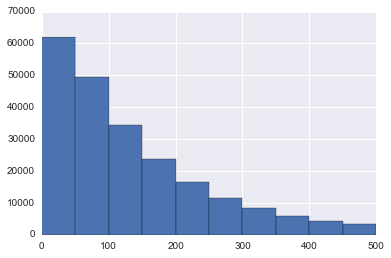

In [210]:
info.order().hist(range=(0, 500))

In [198]:
artists["23d8426c-18c7-46e6-a51d-7395bd43c641"]

'Tangerine Dream'

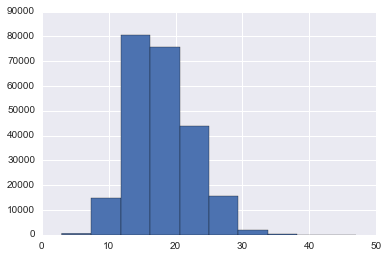

In [222]:
counts = testing.count(axis=0)
counts.order().hist()

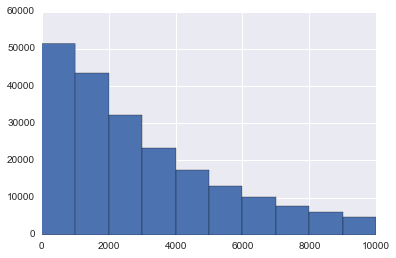

In [226]:
sums = testing.sum(axis=0)
sums.order().hist(range=(0, 10000))

## Finding the elbow

In [119]:
testing = grouped.T
testing = testing.div(testing.sum(axis=1), axis=0)
testing = testing.fillna(0)

In [127]:
ns = [5, 7, 9, 11, 13, 15, 17, 19, 21, 25, 29]
inertias = []
for n in ns:
    K = KMeans(n_clusters=n)
    K.fit_predict(testing)
    inertias.append(K.inertia_)

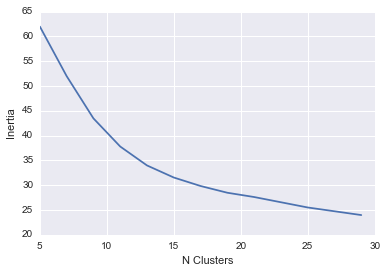

In [128]:
plt.plot(ns, inertias)
plt.xlabel("N Clusters")
plt.ylabel("Inertia")

In [129]:
testing.index

Index([u'03098741-08b3-4dd7-b3f6-1b0bfa2c879c',
       u'69c4cc43-8163-41c5-ac81-30946d27bb69',
       u'7a2e6b55-f149-4e74-be6a-30a1b1a387bb',
       u'7002bf88-1269-4965-a772-4ba1e7a91eaa',
       u'dbf7c761-e332-467b-b4d9-aafe06bbcf8f',
       u'a3cb23fc-acd3-4ce0-8f36-1e5aa6a18432',
       u'8b0f05ce-354e-4121-9e0b-8b4732ea844f',
       u'8363f94f-fd86-41b8-a56b-26eacb34f499',
       u'2e41ae9c-afd2-4f20-8f1e-17281ce9b472',
       u'c17f08f4-2542-46fb-97f3-3202d60c225a', 
       ...
       u'ac9a487a-d9d2-4f27-bb23-0f4686488345',
       u'69b39eab-6577-46a4-a9f5-817839092033',
       u'309c62ba-7a22-4277-9f67-4a162526d18a',
       u'e0953daa-860f-4dc8-9f1a-b12587cdaf17',
       u'5a8688d2-696f-4060-9dd0-f772886ff95b',
       u'ca5b38c2-f39d-45a4-ad3d-daf4448846ef',
       u'8974da95-e631-45aa-8fd7-aa0c2795f997',
       u'8067c102-4996-42bc-9980-06ce2e644eae',
       u'39c2a93d-9afa-4a22-9bba-c087ab056e1c', u'Age'],
      dtype='object', length=2001)